In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

Zunächst werden 2 unimodale Testdatensätze mit gausscher Verteilung erzeugt. Klasse 1(blau) hat eine stärkere Streuung in X-Richtung, Klasse 2(rot) hat eine stärkere Streuung in Y-Richtung. Dies wird über die Kovarianzmatrix eingestellt. Von jeder Klasse werden 1000 Samples erzeugt und dargestellt.

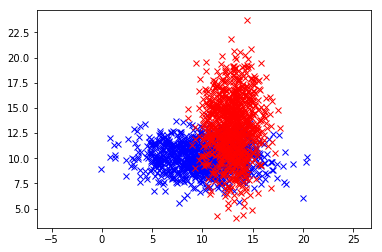

In [33]:
#Unimodale Testdaten
x1, y1 = np.random.multivariate_normal([10, 10], [[10, 0],[0, 2]], 1000).T
plt.plot(x1, y1, 'bx')
x2, y2 = np.random.multivariate_normal([13, 13], [[2, 0],[0, 10]], 1000).T
plt.plot(x2, y2, 'rx')
plt.axis('equal')
plt.show()

Nun wird der Logisitc Regression Klassifikator mit jeweils 700 Samples der beiden Klassen trainiert. Dazu muss jedem Sample ein Label zugeordnet werden zu welcher Klasse es gehört. Diese Samples befinden sich im Array Klassen.

In [21]:
#Logistic Regression
Klassen = []
for j in range(0,1400):
    if j < 700:
        Klassen.append(0)
    else:
        Klassen.append(1)

i = 1
X = [[x1[0],y1[0]]]
while i < 700:
    X += [[x1[i], y1[i]]]
    i += 1
i = 0
while i < 700:
    X += [[x2[i],y2[i]]]
    i += 1
X = np.asarray(X)
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X, Klassen)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Nun werden die ausgewählten Samples, sowie die Trennfunktion des trainierten Klassifikators dargestellt.

([], <a list of 0 Text yticklabel objects>)

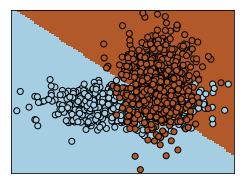

In [22]:
#Darstellung
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=Klassen, edgecolors='k', cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

Um die Güte des Klassifikators zu ermitteln werden nun Vorhersagen für die restlichen 30% der Klassen mit der Funktion predict() gemacht. Anschließend wird die Anzahl der richtig getroffenen Vorhersagen gezählt. Über die Formel 1 - (richtige Vorherhage / gesamtzahl Vorhersagen) wird die Fehlerwahrscheinlichkeit ermittelt.

In [24]:
#Fehlerwahrscheinlichkeit
#Klasse 1
i = 1
X_Test = [[x1[0+700],y1[0+700]]]
while i < 300:
    X_Test += [[x1[i+700], y1[i+700]]]
    i += 1
EstimatedClass = logreg.predict(X_Test)

rightDecision = 0
for ec in EstimatedClass:
    if ec == 0:
        rightDecision += 1
#Klasse 2
i = 1
X_Test = [[x1[0+700],y1[0+700]]]
while i < 300:
    X_Test += [[x2[i+700], y2[i+700]]]
    i += 1
EstimatedClass = logreg.predict(X_Test)

for ec in EstimatedClass:
    if ec == 1:
        rightDecision += 1
Fehlerwahrscheinlichkeit = 1 - (rightDecision / 600)
print('Die Fehlerwahrscheinlichkeit beträgt: ' + str(Fehlerwahrscheinlichkeit))

Die Fehlerwahrscheinlichkeit beträgt: 0.19499999999999995


Als nächstes wird ein Testdatensatz mit multimodaler Verteilung erzeugt(Klasse1, rot). Dieser hat 2 Orte mit größter
Aufenthaltswahrscheinlichkeit, nämlich (10,10) und (20,10). Die Streuung dieser Klasse ist in jede Richtung gleichmäßig ausgeprägt. Die zweite Klasse befindet sich leicht unterhalb zwischen den beiden Peaks der ersten Klasse. Auch ihre Streuung ist gleichmäßig in jede Richtung ausgeprägt.

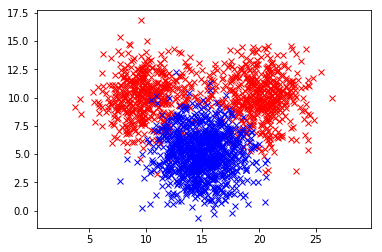

In [34]:
#Multimodale Testdaten
x3, y3 = np.random.multivariate_normal([10, 10], [[4, 0],[0, 4]], 500).T
x4, y4 = np.random.multivariate_normal([20, 10], [[4, 0],[0, 4]], 500).T
x5 = np.concatenate((x3,x4))
y5 = np.concatenate((y3,y4))
x6,y6 = np.random.multivariate_normal([15, 5], [[4, 0],[0, 4]], 1000).T
plt.plot(x5, y5, 'rx')
plt.plot(x6,y6,'bx');
plt.axis('equal')
plt.show()

Nun wird analog zu den unimodalen Datensätzen der Logistic Regression Klassifikator mit 70% der erzeugten Samples der Datensätze mit multimodaler und unimodaler Verteilung trainiert.

In [35]:
#Logistic Regression mit Multimodaler Klasse
i = 1
X = [[x5[0],y5[0]]]
while i < 700:
    X += [[x5[i], y5[i]]]
    i += 1
i = 0
while i < 700:
    X += [[x6[i],y6[i]]]
    i += 1
X = np.asarray(X)
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X, Klassen)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Darstellung der der erzeugten Samples sowie der ermittelten Trennfunktion.

([], <a list of 0 Text yticklabel objects>)

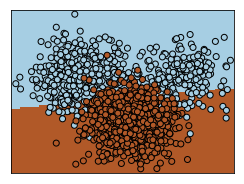

In [37]:
#Darstellung
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=Klassen, edgecolors='k', cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

Ermittlung der Fehlerwahrscheinlichkeit analog zu unimodalen Testdaten.

In [38]:
#Fehlerwahrscheinlichkeit
#Fehlerwahrscheinlichkeit
#Klasse 1
i = 1
X_Test = [[x5[0+700],y5[0+700]]]
while i < 300:
    X_Test += [[x5[i+700], y5[i+700]]]
    i += 1
EstimatedClass = logreg.predict(X_Test)

rightDecision = 0
for ec in EstimatedClass:
    if ec == 0:
        rightDecision += 1
#Klasse 2
i = 1
X_Test = [[x6[0+700],y6[0+700]]]
while i < 300:
    X_Test += [[x6[i+700], y6[i+700]]]
    i += 1
EstimatedClass = logreg.predict(X_Test)

for ec in EstimatedClass:
    if ec == 1:
        rightDecision += 1
Fehlerwahrscheinlichkeit = 1 - (rightDecision / 600)
print('Die Fehlerwahrscheinlichkeit beträgt: ' + str(Fehlerwahrscheinlichkeit))

Die Fehlerwahrscheinlichkeit beträgt: 0.1316666666666667
